In [1]:
#Importing required libraries for execution

import pandas as pd
import numpy as np

Data Ingestion

In [2]:
#Data Ingestion, stored locally

data = pd.read_csv('train.csv')

#Sample view of the whole data
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
#Statistical information related to numerical data in the dataset
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [4]:
#Information regarding the data types and non-null values of individual attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   POSTED_BY              29451 non-null  object 
 1   UNDER_CONSTRUCTION     29451 non-null  int64  
 2   RERA                   29451 non-null  int64  
 3   BHK_NO.                29451 non-null  int64  
 4   BHK_OR_RK              29451 non-null  object 
 5   SQUARE_FT              29451 non-null  float64
 6   READY_TO_MOVE          29451 non-null  int64  
 7   RESALE                 29451 non-null  int64  
 8   ADDRESS                29451 non-null  object 
 9   LONGITUDE              29451 non-null  float64
 10  LATITUDE               29451 non-null  float64
 11  TARGET(PRICE_IN_LACS)  29451 non-null  float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [5]:
# No. of rows in the dataset: 29451
# It contains no null values
# datatypes observed are int, float and object
# Categorical columns: POSTED_BY (object)

Null value identification

In [6]:
#Just for clarification, this can be infered from info as well
data.isnull().sum()

,0
POSTED_BY,0
UNDER_CONSTRUCTION,0
RERA,0
BHK_NO.,0
BHK_OR_RK,0
SQUARE_FT,0
READY_TO_MOVE,0
RESALE,0
ADDRESS,0
LONGITUDE,0


In [7]:
# Rename columns for eliminating ambiguity

# Capital to small letters
# remove '.' in bhk_no.
# Remove () in target
data.columns = data.columns.str.lower().str.replace('.', '').str.replace('(', '').str.replace(')', '')
data.columns

Index(['posted_by', 'under_construction', 'rera', 'bhk_no', 'bhk_or_rk',
       'square_ft', 'ready_to_move', 'resale', 'address', 'longitude',
       'latitude', 'targetprice_in_lacs'],
      dtype='object')

In [8]:
# Address attribute is neglected, using latitude longitude information in place of that data

data = data.drop( columns = ['address'])

In [10]:
# Identification of numerical and categorical columns

num_cols = data.select_dtypes( include = ['int64', 'float64'] ).columns
cat_cols = data.select_dtypes( include = ['object'] ).columns

In [11]:
cat_cols

Index(['posted_by', 'bhk_or_rk'], dtype='object')

In [12]:
#Handling missing values is not performed as no NaN values are in the data

In [13]:
# Search duplicate rows if any
data.duplicated().any()

np.True_

In [14]:
# So duplicates exist, let's count no.of duplicates
data.duplicated().sum()

np.int64(885)

In [15]:
# Inspecting duplicated rows (without first occurence)

data[data.duplicated()]

,posted_by,under_construction,rera,bhk_no,bhk_or_rk,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs
827,Dealer,0,0,2,BHK,1050.019091,1,1,19.256471,72.868815,110.0
1858,Dealer,0,1,4,BHK,2799.865606,1,1,19.049214,73.072916,500.0
1904,Dealer,1,0,3,BHK,1209.628644,0,1,22.541110,88.337780,100.0
1945,Dealer,1,1,1,BHK,620.051512,0,1,19.222101,72.988231,65.0
2049,Dealer,0,0,1,BHK,655.021834,1,1,18.973908,73.025106,45.0
...,...,...,...,...,...,...,...,...,...,...,...
29345,Dealer,1,1,3,BHK,1563.155686,0,1,30.684523,76.691728,74.5
29357,Owner,0,1,3,BHK,1446.201311,1,1,28.596320,77.381430,75.0
29389,Builder,1,0,3,BHK,979.290979,0,0,22.747639,88.600902,27.9
29401,Dealer,0,0,2,BHK,556.818709,1,1,19.256471,72.868815,120.0


In [16]:
# Eliminating duplicated rows (data)

data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28566 entries, 0 to 29450
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   posted_by            28566 non-null  object 
 1   under_construction   28566 non-null  int64  
 2   rera                 28566 non-null  int64  
 3   bhk_no               28566 non-null  int64  
 4   bhk_or_rk            28566 non-null  object 
 5   square_ft            28566 non-null  float64
 6   ready_to_move        28566 non-null  int64  
 7   resale               28566 non-null  int64  
 8   longitude            28566 non-null  float64
 9   latitude             28566 non-null  float64
 10  targetprice_in_lacs  28566 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.6+ MB


Identifying outliers

In [17]:
# Detecting outliers using IQR Method

def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

In [18]:
# Checking the outliers in the square_ft (area) attribute

outliers_area = iqr_outliers(data["square_ft"])
len(outliers_area) #No outliers in this attribute

1587

In [19]:
# Checking the outliers in the targetprice_in_lacs (price) attribute

outliers_area = iqr_outliers(data["targetprice_in_lacs"])
len(outliers_area) #No outliers in this attribute as well

2896

In [20]:
# Outliers identified, will be handled in further steps

In [21]:
#Converting categorical data into numeric data

data = pd.get_dummies(data, columns = cat_cols, drop_first = True)

In [24]:
# Managing datatypes

data['posted_by_Dealer'] = data['posted_by_Dealer'].astype(int)
data['bhk_or_rk_RK'] = data['bhk_or_rk_RK'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28566 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   28566 non-null  int64  
 1   rera                 28566 non-null  int64  
 2   bhk_no               28566 non-null  int64  
 3   square_ft            28566 non-null  float64
 4   ready_to_move        28566 non-null  int64  
 5   resale               28566 non-null  int64  
 6   longitude            28566 non-null  float64
 7   latitude             28566 non-null  float64
 8   targetprice_in_lacs  28566 non-null  float64
 9   posted_by_Dealer     28566 non-null  int64  
 10  posted_by_Owner      28566 non-null  bool   
 11  bhk_or_rk_RK         28566 non-null  int64  
dtypes: bool(1), float64(4), int64(7)
memory usage: 2.6 MB


In [25]:
data = data.rename( columns = { 'posted_by_Dealer' : 'dealer_posted', 'bhk_or_rk_RK' : 'rk'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28566 entries, 0 to 29450
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   under_construction   28566 non-null  int64  
 1   rera                 28566 non-null  int64  
 2   bhk_no               28566 non-null  int64  
 3   square_ft            28566 non-null  float64
 4   ready_to_move        28566 non-null  int64  
 5   resale               28566 non-null  int64  
 6   longitude            28566 non-null  float64
 7   latitude             28566 non-null  float64
 8   targetprice_in_lacs  28566 non-null  float64
 9   dealer_posted        28566 non-null  int64  
 10  posted_by_Owner      28566 non-null  bool   
 11  rk                   28566 non-null  int64  
dtypes: bool(1), float64(4), int64(7)
memory usage: 2.6 MB


In [26]:
data["lat_int"] = data["latitude"].astype(int)
data["lon_int"] = data["longitude"].astype(int)

In [27]:
data.head()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,targetprice_in_lacs,dealer_posted,posted_by_Owner,rk,lat_int,lon_int
0,0,0,2,1300.236407,1,1,12.969910,77.597960,55.0,0,True,0,77,12
1,0,0,2,1275.000000,1,1,12.274538,76.644605,51.0,1,False,0,76,12
2,0,0,2,933.159722,1,1,12.778033,77.632191,43.0,0,True,0,77,12
3,0,1,2,929.921143,1,1,28.642300,77.344500,62.5,0,True,0,77,28
4,1,0,2,999.009247,0,1,22.592200,88.484911,60.5,1,False,0,88,22


In [28]:
# Use latitude longitude data to correlate with location (merge and make a single attribute)

data["location"] = (
    data["lat_int"].astype(str) + "_" + data["lon_int"].astype(str)
).astype('category').cat.codes


In [29]:
data = data.drop( columns = ['longitude', 'latitude', 'lat_int', 'lon_int'])

In [30]:
data['location'].nunique()

280

In [31]:
data.head()

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,targetprice_in_lacs,dealer_posted,posted_by_Owner,rk,location
0,0,0,2,1300.236407,1,1,55.0,0,True,0,142
1,0,0,2,1275.000000,1,1,51.0,1,False,0,120
2,0,0,2,933.159722,1,1,43.0,0,True,0,142
3,0,1,2,929.921143,1,1,62.5,0,True,0,157
4,1,0,2,999.009247,0,1,60.5,1,False,0,266


In [32]:
# Using Log-scaling (best for housr-price prediction)

data["square_ft_log"] = np.log1p(data["square_ft"])
data["price_log"] = np.log1p(data["targetprice_in_lacs"])

In [33]:
data = data.drop( columns = ['square_ft', 'targetprice_in_lacs'])

In [34]:
data = data.drop( columns = ['posted_by_Owner'])
data.head()

,under_construction,rera,bhk_no,ready_to_move,resale,dealer_posted,rk,location,square_ft_log,price_log
0,0,0,2,1,1,0,0,142,7.171070,4.025352
1,0,0,2,1,1,1,0,120,7.151485,3.951244
2,0,0,2,1,1,0,0,142,6.839647,3.784190
3,0,1,2,1,1,0,0,157,6.836175,4.151040
4,1,0,2,0,1,1,0,266,6.907765,4.119037


Eliminating Outliers

In [36]:
# Detecting outliers using IQR Method

def iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series[(series < lower) | (series > upper)]

In [38]:
# Checking the outliers in the square_ft (area) attribute

outliers_area = iqr_outliers(data["square_ft_log"])
len(outliers_area)

996

In [39]:
# Checking the outliers in the square_ft (area) attribute

outliers_price = iqr_outliers(data["price_log"])
len(outliers_price)

847

In [40]:
def cap_iqr_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return np.clip(series, lower, upper)

In [41]:
data["square_ft_log"] = cap_iqr_outliers(data["square_ft_log"])
data["price_log"] = cap_iqr_outliers(data["price_log"])

In [42]:
# Checking the outliers in the square_ft (area) attribute

outliers_area = iqr_outliers(data["square_ft_log"])
len(outliers_area)

0

In [43]:
# Checking the outliers in the square_ft (area) attribute

outliers_price = iqr_outliers(data["price_log"])
len(outliers_price)

0

In [44]:
# Outliers are eliminated

Exploratory Data Analysis (EDA)

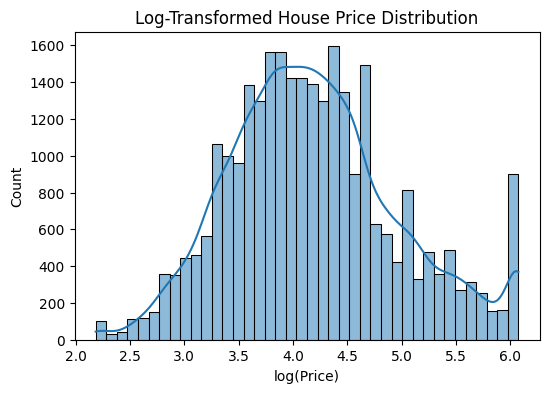

In [46]:
#House Price Distribution

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(data["price_log"], bins=40, kde=True)
plt.title("Log-Transformed House Price Distribution")
plt.xlabel("log(Price)")
plt.show()


In [47]:
# Expect near-normal distribution
# Confirms log transform success

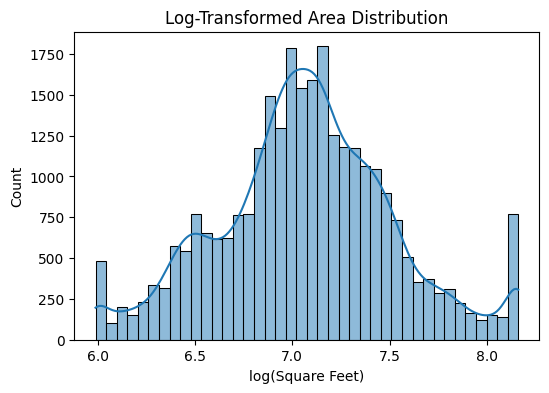

In [48]:
#Area Distribution

plt.figure(figsize=(6,4))
sns.histplot(data["square_ft_log"], bins=40, kde=True)
plt.title("Log-Transformed Area Distribution")
plt.xlabel("log(Square Feet)")
plt.show()


In [49]:
# Reduced skew
# Outliers under control

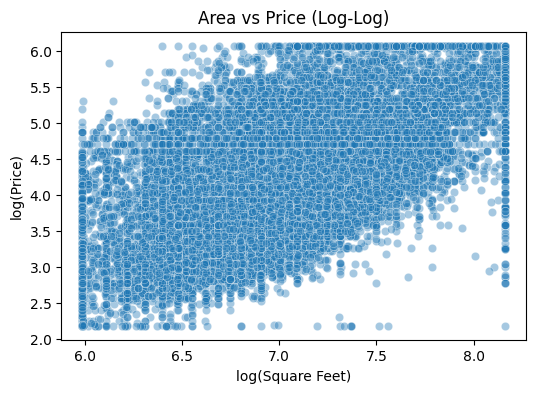

In [50]:
#Area vs price

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=data["square_ft_log"],
    y=data["price_log"],
    alpha=0.4
)
plt.xlabel("log(Square Feet)")
plt.ylabel("log(Price)")
plt.title("Area vs Price (Log-Log)")
plt.show()


In [51]:
# Mostly linear trend observed

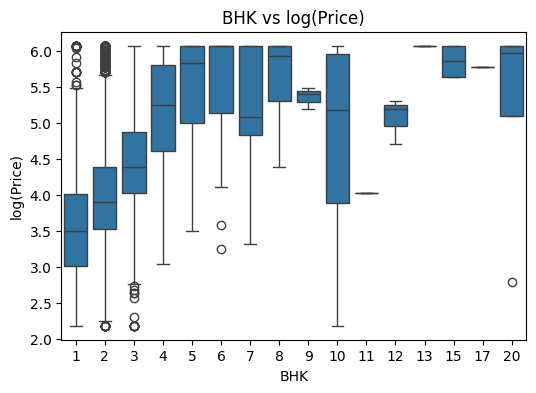

In [52]:
#No of rooms vs price

plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["bhk_no"],
    y=data["price_log"]
)
plt.title("BHK vs log(Price)")
plt.xlabel("BHK")
plt.ylabel("log(Price)")
plt.show()


In [53]:
#Nearly, more no of rooms resulted in higher price (some exceptions)

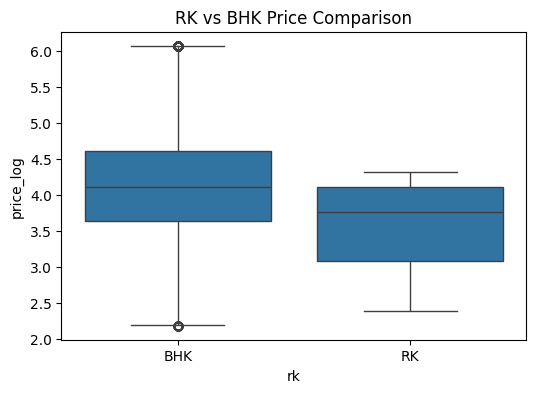

In [54]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["rk"],
    y=data["price_log"]
)
plt.xticks([0,1], ["BHK", "RK"])
plt.title("RK vs BHK Price Comparison")
plt.show()


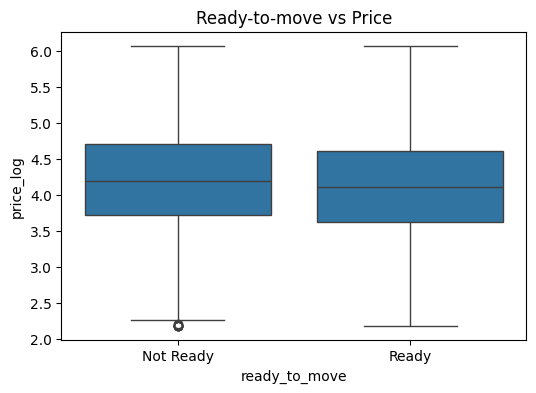

In [55]:
#Ready to move vs price

plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["ready_to_move"],
    y=data["price_log"]
)
plt.xticks([0,1], ["Not Ready", "Ready"])
plt.title("Ready-to-move vs Price")
plt.show()


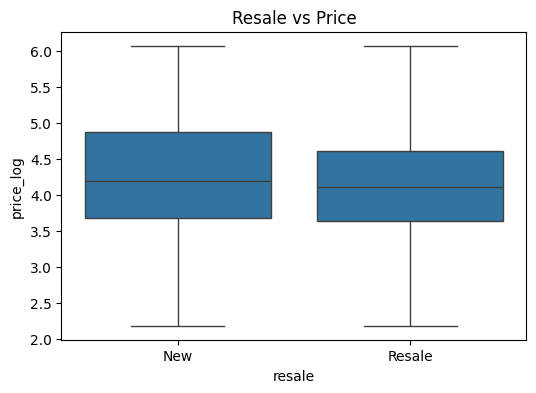

In [56]:
#Resale vs price

plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["resale"],
    y=data["price_log"]
)
plt.xticks([0,1], ["New", "Resale"])
plt.title("Resale vs Price")
plt.show()


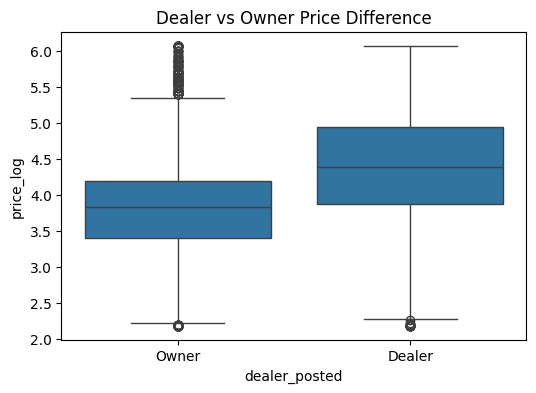

In [57]:
#Owner vs price

plt.figure(figsize=(6,4))
sns.boxplot(
    x=data["dealer_posted"],
    y=data["price_log"]
)
plt.xticks([0,1], ["Owner", "Dealer"])
plt.title("Dealer vs Owner Price Difference")
plt.show()


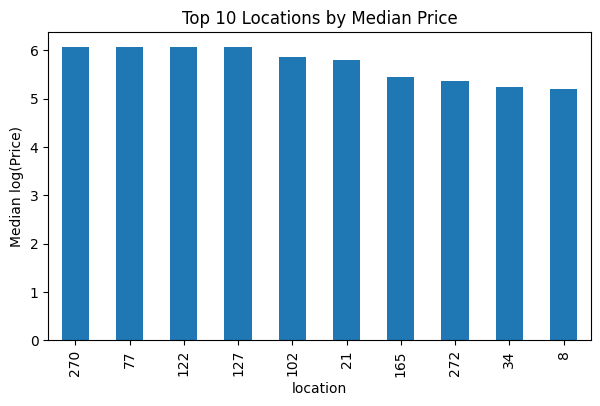

In [58]:
#Location vs price

top_locations = (
    data.groupby("location")["price_log"]
    .median()
    .sort_values(ascending=False)
    .head(10)
)

top_locations.plot(kind="bar", figsize=(7,4))
plt.title("Top 10 Locations by Median Price")
plt.ylabel("Median log(Price)")
plt.show()


Correlation Matrix to understand dependencies

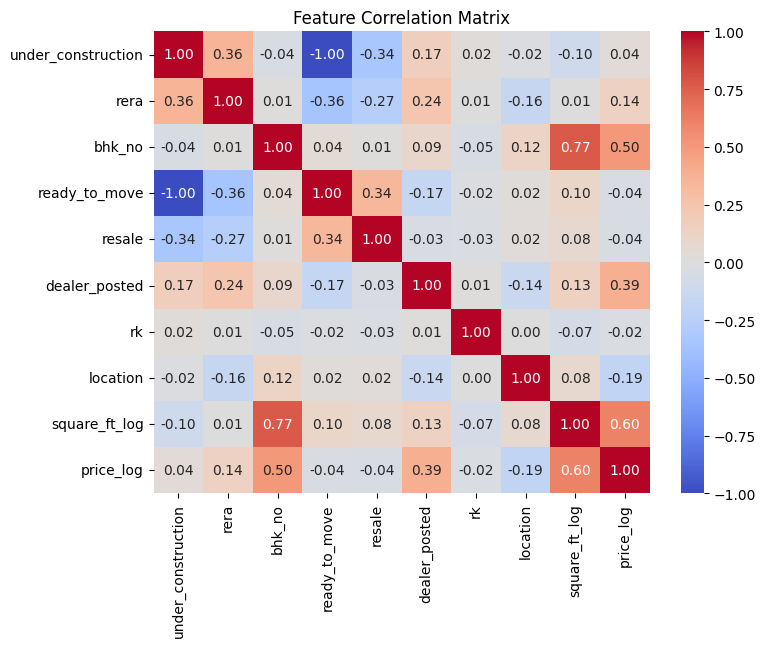

In [59]:
plt.figure(figsize=(8,6))
sns.heatmap(
    data.corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Feature Correlation Matrix")
plt.show()

In [60]:
# Log transforms worked
# Area is the strongest continuous predictor
# BHK is ordinal and meaningful
# RK, resale, ready-to-move affect pricing
# Location is extremely influential
# Tree-based + linear models both applicable
# Feature interactions likely beneficial

Feature Engineering

In [62]:
target = "price_log"
X = data.drop(columns=[target])
y = data[target]

In [63]:
X["bhk_density"] = X["bhk_no"] / X["square_ft_log"]

In [64]:
X["construction_status"] = ( X["under_construction"] & (1 - X["ready_to_move"]) )

In [65]:
X["property_type"] = X["rk"]  # 1 = RK, 0 = BHK

In [66]:
X = X.drop(columns=[
    "under_construction",   # merged
    "ready_to_move",        # merged
    "rk"                    # encoded in property_type
])

In [67]:
from sklearn.preprocessing import StandardScaler

scale_cols = ["square_ft_log", "bhk_density"]

scaler = StandardScaler()
X[scale_cols] = scaler.fit_transform(X[scale_cols])

In [68]:
#Just to get the idea of feature importances

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

importances = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances

,0
square_ft_log,0.492565
location,0.272041
bhk_density,0.120507
dealer_posted,0.072310
bhk_no,0.014425
rera,0.012388
construction_status,0.009266
resale,0.006163
property_type,0.000335


Feature Importance Plot (for visualization only)

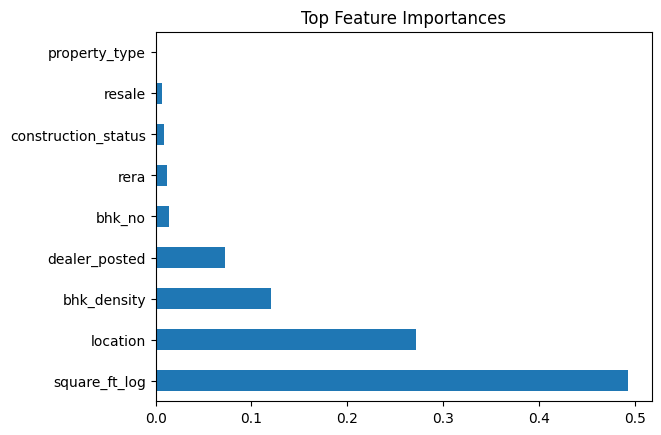

In [70]:
importances.head(10).plot(kind="barh")
plt.title("Top Feature Importances")
plt.show()

Model selection, Training, Testing and Validation

In [71]:
from sklearn.model_selection import train_test_split

# Step 1: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

# Step 2: Split Temp into Test (20%) and Validation (10%)
X_test, X_val, y_test, y_val = train_test_split(
    X_temp, y_temp,
    test_size=1/3,   # 10% of total
    random_state=42
)


In [72]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model_3sets(model, X_train, y_train, X_test, y_test, X_val, y_val):
    model.fit(X_train, y_train)

    def metrics(y_true, y_pred):
        return (
            np.sqrt(mean_squared_error(y_true, y_pred)),  # RMSE
            mean_absolute_error(y_true, y_pred),          # MAE
            r2_score(y_true, y_pred)                      # R2
        )

    train_metrics = metrics(y_train, model.predict(X_train))
    test_metrics  = metrics(y_test, model.predict(X_test))
    val_metrics   = metrics(y_val, model.predict(X_val))

    return train_metrics, test_metrics, val_metrics


In [73]:
#Linear Regression

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_train, lr_test, lr_val = evaluate_model_3sets(
    lr, X_train, y_train, X_test, y_test, X_val, y_val
)


In [74]:
#Ridge

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge_train, ridge_test, ridge_val = evaluate_model_3sets(
    ridge, X_train, y_train, X_test, y_test, X_val, y_val
)


In [75]:
#Lasso

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001, max_iter=5000)
lasso_train, lasso_test, lasso_val = evaluate_model_3sets(
    lasso, X_train, y_train, X_test, y_test, X_val, y_val
)


In [76]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_train, rf_test, rf_val = evaluate_model_3sets(
    rf, X_train, y_train, X_test, y_test, X_val, y_val
)


In [77]:
#XGBoost

from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb_train, xgb_test, xgb_val = evaluate_model_3sets(
    xgb, X_train, y_train, X_test, y_test, X_val, y_val
)


In [78]:
# Results

import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso", "Random Forest", "XGBoost"],

    "Train_RMSE": [lr_train[0], ridge_train[0], lasso_train[0], rf_train[0], xgb_train[0]],
    "Test_RMSE":  [lr_test[0],  ridge_test[0],  lasso_test[0],  rf_test[0],  xgb_test[0]],
    "Val_RMSE":   [lr_val[0],   ridge_val[0],   lasso_val[0],   rf_val[0],   xgb_val[0]],

    "Train_R2":   [lr_train[2], ridge_train[2], lasso_train[2], rf_train[2], xgb_train[2]],
    "Test_R2":    [lr_test[2],  ridge_test[2],  lasso_test[2],  rf_test[2],  xgb_test[2]],
    "Val_R2":     [lr_val[2],   ridge_val[2],   lasso_val[2],   rf_val[2],   xgb_val[2]]
})

results


,Model,Train_RMSE,Test_RMSE,Val_RMSE,Train_R2,Test_R2,Val_R2
0,Linear,0.545679,0.552589,0.540081,0.516238,0.496858,0.522963
1,Ridge,0.545680,0.552567,0.540042,0.516237,0.496898,0.523031
2,Lasso,0.546237,0.552644,0.540254,0.515249,0.496759,0.522656
3,Random Forest,0.166916,0.418937,0.401703,0.954736,0.710809,0.736097
4,XGBoost,0.349680,0.400748,0.384718,0.801345,0.735377,0.757941


Confusion Matrix for Performance Evaluation

In [79]:
import numpy as np

def create_price_classes(y, n_classes=3):
    return pd.qcut(y, q=n_classes, labels=False)

In [80]:
y_test_class = create_price_classes(y_test, n_classes=3)

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Class")
    plt.ylabel("Actual Class")
    plt.title(title)
    plt.show()

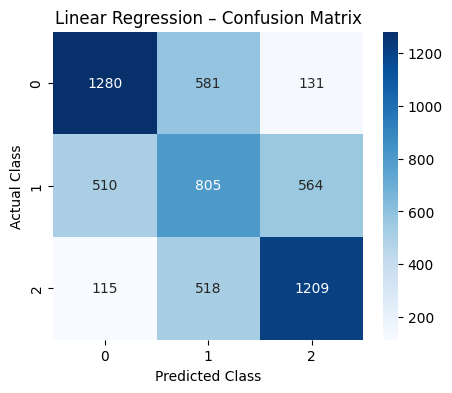

In [82]:
y_pred_lr = lr.predict(X_test)
y_pred_lr_class = create_price_classes(y_pred_lr, n_classes=3)

plot_confusion_matrix(
    y_test_class,
    y_pred_lr_class,
    "Linear Regression – Confusion Matrix"
)


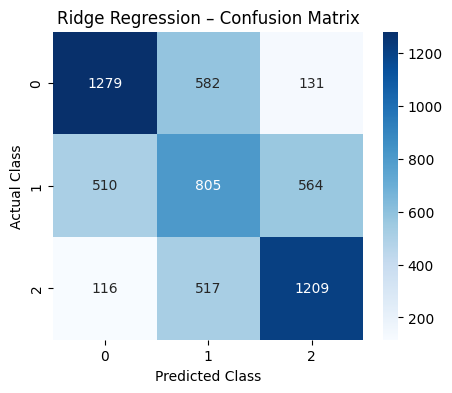

In [83]:
y_pred_ridge = ridge.predict(X_test)
y_pred_ridge_class = create_price_classes(y_pred_ridge, n_classes=3)

plot_confusion_matrix(
    y_test_class,
    y_pred_ridge_class,
    "Ridge Regression – Confusion Matrix"
)


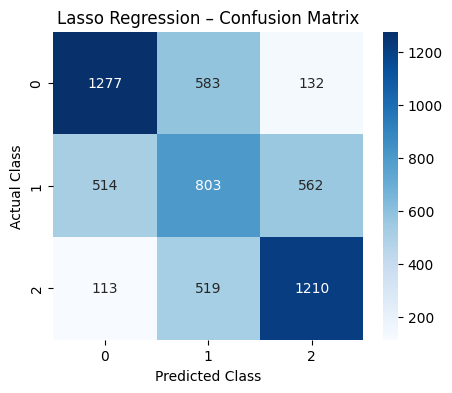

In [84]:
y_pred_lasso = lasso.predict(X_test)
y_pred_lasso_class = create_price_classes(y_pred_lasso, n_classes=3)

plot_confusion_matrix(
    y_test_class,
    y_pred_lasso_class,
    "Lasso Regression – Confusion Matrix"
)


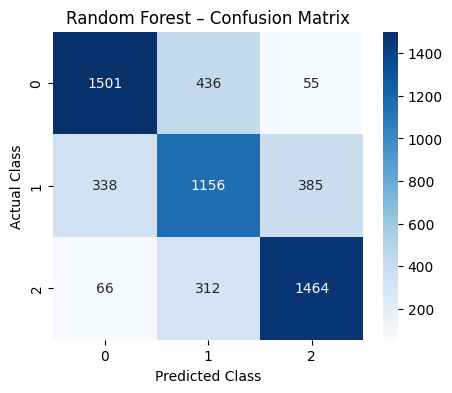

In [85]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_class = create_price_classes(y_pred_rf, n_classes=3)

plot_confusion_matrix(
    y_test_class,
    y_pred_rf_class,
    "Random Forest – Confusion Matrix"
)


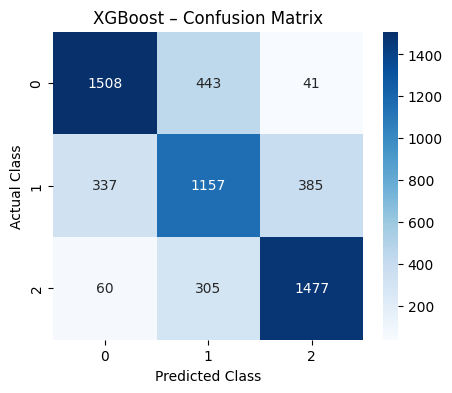

In [86]:
y_pred_xgb = xgb.predict(X_test)
y_pred_xgb_class = create_price_classes(y_pred_xgb, n_classes=3)

plot_confusion_matrix(
    y_test_class,
    y_pred_xgb_class,
    "XGBoost – Confusion Matrix"
)


In [89]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(rf, f)